In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import nltk
import re

In [4]:
# 📥 Load the models and vectorizer
lr_model = joblib.load("logistic_model.pkl")
svm_model = joblib.load("svm_model.pkl")
rf_model = joblib.load("rf_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [6]:
# 📥 Load dataset again (same one you trained on)
df = pd.read_csv("hate_speech_detection_train.csv")
df = df[["tweet", "class"]]
df.dropna(inplace=True)

In [15]:
# 🧼 Text Cleaning (same method used earlier)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|[^a-z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_tweet"] = df["tweet"].apply(clean_text)

In [9]:
# 🔀 Train-Test Split
from sklearn.model_selection import train_test_split
X = df["clean_tweet"]
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# 🔠 TF-IDF Transform
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
# 📊 Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

    # Heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

🔹 Logistic Regression Accuracy: 0.8628

Confusion Matrix:
[[  43  211   32]
 [  31 3612  195]
 [   1  210  622]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.15      0.24       286
           1       0.90      0.94      0.92      3838
           2       0.73      0.75      0.74       833

    accuracy                           0.86      4957
   macro avg       0.73      0.61      0.63      4957
weighted avg       0.85      0.86      0.85      4957


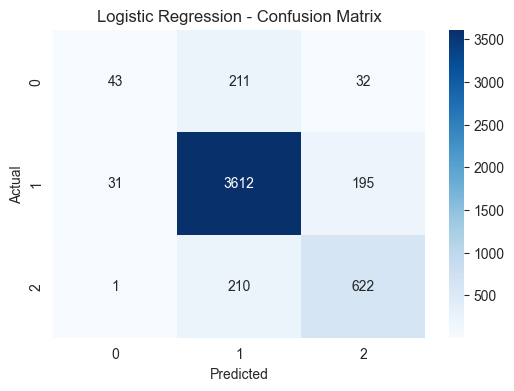

🔹 SVM Accuracy: 0.8572

Confusion Matrix:
[[  54  197   35]
 [  47 3587  204]
 [   8  217  608]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.19      0.27       286
           1       0.90      0.93      0.92      3838
           2       0.72      0.73      0.72       833

    accuracy                           0.86      4957
   macro avg       0.70      0.62      0.64      4957
weighted avg       0.84      0.86      0.85      4957


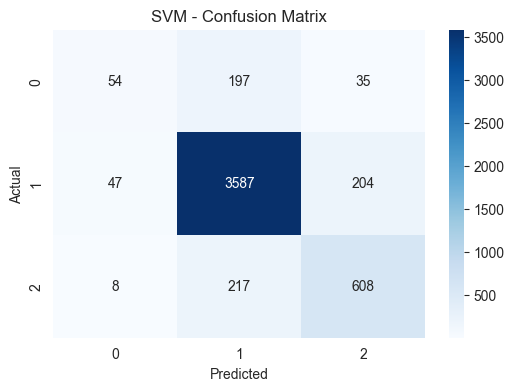

🔹 Random Forest Accuracy: 0.8392

Confusion Matrix:
[[  31  210   45]
 [  21 3428  389]
 [   2  130  701]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.11      0.18       286
           1       0.91      0.89      0.90      3838
           2       0.62      0.84      0.71       833

    accuracy                           0.84      4957
   macro avg       0.70      0.61      0.60      4957
weighted avg       0.84      0.84      0.83      4957


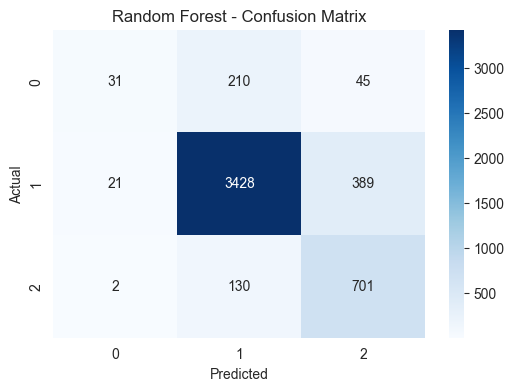

In [13]:
# 🧪 Analyze all models
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(svm_model, "SVM")
evaluate_model(rf_model, "Random Forest")